# Scaling performance with the number of particles
We here test some scaling of our code with the number of particles

## Imports

In [ ]:
import mm_2019_sss_1 as mm
import matplotlib.pyplot as plt
import numpy as np

## Hardware

Optionally, show CPU info for reference.

In [2]:
!pip install py-cpuinfo
from cpuinfo import get_cpu_info
get_cpu_info()

{'python_version': '3.7.3.final.0 (64 bit)',
 'cpuinfo_version': [5, 0, 0],
 'arch': 'X86_64',
 'bits': 64,
 'count': 4,
 'raw_arch_string': 'x86_64',
 'vendor_id': 'GenuineIntel',
 'brand': 'Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz',
 'hz_advertised': '1.6000 GHz',
 'hz_actual': '1.6000 GHz',
 'hz_advertised_raw': [1600000000, 0],
 'hz_actual_raw': [1600000000, 0],
 'l2_cache_size': '256',
 'stepping': 9,
 'model': 142,
 'family': 6,
 'flags': ['1gbpage',
  'acpi',
  'adx',
  'aes',
  'apic',
  'avx1.0',
  'avx2',
  'bmi1',
  'bmi2',
  'clfsh',
  'clfsopt',
  'cmov',
  'cx16',
  'cx8',
  'de',
  'ds',
  'dscpl',
  'dtes64',
  'em64t',
  'erms',
  'est',
  'f16c',
  'fma',
  'fpu',
  'fpu_csds',
  'fxsr',
  'htt',
  'ibrs',
  'invpcid',
  'ipt',
  'l1df',
  'lahf',
  'lzcnt',
  'mca',
  'mce',
  'mmx',
  'mon',
  'movbe',
  'mpx',
  'msr',
  'mtrr',
  'osxsave',
  'pae',
  'pat',
  'pbe',
  'pcid',
  'pclmulqdq',
  'pdcm',
  'pge',
  'popcnt',
  'prefetchw',
  'pse',
  'pse36',
  'rdra

# Performance tests
Here we test our performance by fixing all the simulation paramters and varying only the number of particles `n_particles = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 20000]`. The performance is measured in seconds-per-step and is extracted for each simulation.

In [5]:
n_particles = [10, 100, 250, 500, 1000, 2500, 5000, 10000, 20000]
n_steps = 50000
performance_steps = list()
for particles in n_particles:
    sim = mm.MC(method='random', num_particles=particles, reduced_den=0.9, reduced_temp=0.9, max_displacement=0.1, cutoff=3.0)
    print(f"{particles} particles:")
    sim.run(n_steps=n_steps, freq=n_steps+10)
    print("------------------------------------")
    performance_steps.append(sim.performance)
performance_steps = np.array(performance_steps)

10 particles:
Performance: 0.10949 seconds / 1000 steps
------------------------------------
100 particles:
Performance: 0.13045 seconds / 1000 steps
------------------------------------
250 particles:
Performance: 0.15382 seconds / 1000 steps
------------------------------------
500 particles:
Performance: 0.18461 seconds / 1000 steps
------------------------------------
1000 particles:
Performance: 0.2315 seconds / 1000 steps
------------------------------------
2500 particles:
Performance: 0.39595 seconds / 1000 steps
------------------------------------
5000 particles:
Performance: 0.57193 seconds / 1000 steps
------------------------------------
10000 particles:
Performance: 0.94902 seconds / 1000 steps
------------------------------------
20000 particles:
Performance: 1.69405 seconds / 1000 steps
------------------------------------


We can not plot the relative performance compared to the `n_particles = 10` run to get an idea of the scaling. Visualizing this we see some nice linear scaling.

Text(0.5, 1.0, 'Seconds per step relative to 10 particle run')

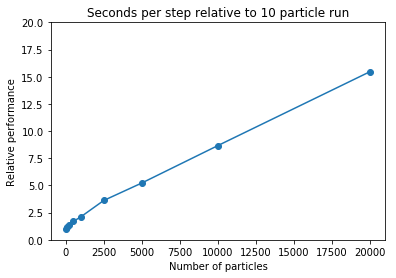

In [15]:
plt.plot(n_particles, performance_steps / performance_steps[0], marker='o')
plt.ylim(0,20)
plt.ylabel("Relative performance")
plt.xlabel("Number of particles")
plt.title("Seconds per step relative to 10 particle run")

Text(0.5, 1.0, 'Seconds per step relative to 10 particle run')

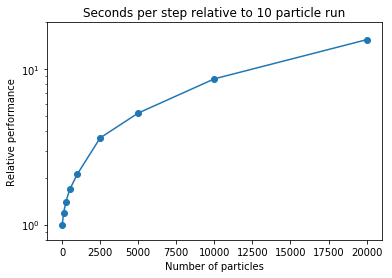

In [16]:
plt.semilogy(n_particles, performance_steps / performance_steps[0], marker='o')
plt.ylim(0.8,20)
plt.ylabel("Relative performance")
plt.xlabel("Number of particles")
plt.title("Seconds per step relative to 10 particle run")